### 1 Project Introduction

Our project mainly focuses on the daily trending videos on YouTube and hopefully the analysis of which will reveal an insight of what is common between the popular videos and the topics appealing to different users. Here are the questions we are interested in:

1.	What are the common trends on YouTube in general?   
•	What are the popular categories in a particular month?  
•	Is there any discrepancy between different country?

2.	What factors affect the popularity of a YouTube video?
•	Which categories of YouTube videos are the most popular?  
•	Which video category (e.g. entertainment, gaming, comedy, etc.) has the largest number of trending videos?
•	What are the top 10 most popular tags?  
•	What types of tags frequently appear in the most top-trending videos?  
•	Which YouTube channels have the largest number of trending videos?

3.	What is the best posting time on Youtube to be on the top trending?  
•	 When were the trending videos usually published? On which days of the week? At which times of the day?


The first part of our research questions focuses on the most popular categories of the trending videos and tries to discover whether this trend can last in a certain time period and throughout different parts of the world.  
The second part and the third part of our analysis try to find out the factors affectiong whether a video will become trending in YouTube and this can become a guideline for YouTubers wanting to attract more viewers for their production.  

### 2 Heavier Grading on Data Analysis

At the beginning of this journey, we had a very simple list of basic findings. At the end of this analysis, we are blown away by the insights that data has shown us. For example, initially we thought that trending videos are usually posted on weekends between 7pm - 12am midnight. However, we were surprised to find that the most trending videos are published at 5 am in the morning specifically on Fridays. Furthermore, an initially thought that views, likes and comments contribute to the popularity of the video was changed when we learnt that  posting time and day of the week are extremely important in determining the fame of a video. Analysing this pattern across multiple countries and over multiple weekdays, we have provided some expected as well as a lot of unexpected findings through our data analysis. Thus, we think that our data analysis should be graded heavier.

### 3 Data Processing

In [1]:
import pandas as pd
import numpy as np
%pylab inline
import matplotlib as plt
import seaborn as sns
import os
import random
from textblob import TextBlob
import re
import sys
from wordcloud import WordCloud
import json
import spacy
from numpy import nan as NA
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
## reading into python all csv files
path = 'C:\\Users\\Aishwarya\\Downloads\\Acads\\Semester 2\\Prof Bono\\Bono Project\\'
df_CA = pd.read_csv(path+"CAvideos.csv", encoding='utf-8')
df_DE = pd.read_csv(path+"DEvideos.csv", encoding='utf-8')
df_FR = pd.read_csv(path+"FRvideos.csv", encoding='utf-8')
df_GB = pd.read_csv(path+"GBvideos.csv", encoding='utf-8')
df_IN = pd.read_csv(path+"INvideos.csv", encoding='utf-8')
df_JP = pd.read_csv(path+"JPvideos.csv", encoding='utf-8')
df_KR = pd.read_csv(path+"KRvideos.csv", encoding='utf-8')
df_MX = pd.read_csv(path+"MXvideos.csv", encoding='utf-8')
df_RU = pd.read_csv(path+"RUvideos.csv", encoding='utf-8')
df_US = pd.read_csv(path+"USvideos.csv", encoding='utf-8')

names_of_dataframes = [df_CA,df_DE,df_FR,df_GB,df_IN,df_JP,df_KR,df_MX,df_RU,df_US]
langlist = []
for i in names_of_dataframes:
    if (TextBlob(i['description'][0]).detect_language() == 'en'):
        langlist.append('en')
    else:
        langlist.append('not_en')
        
#adding the "Country" column for all datasets
names_of_countries = ['CA','DE','FR','GB','IN','JP','KR','MX','RU','US']
names_of_dataframes = [df_CA,df_DE,df_FR,df_GB,df_IN,df_JP,df_KR,df_MX,df_RU,df_US]
for i in range(len(names_of_countries)):
    names_of_dataframes[i]['Country'] = names_of_countries[i]       

#combining all dataframes into one dataframe
names_of_dataframes = [df_DE,df_FR,df_GB,df_IN,df_JP,df_KR,df_MX,df_RU,df_US]
#textproc_df = pd.DataFrame(df_CA)
final_df = pd.DataFrame(df_CA)
for i in names_of_dataframes:
    #if (TextBlob(i['title'][random.randint(1,10)]).detect_language() == 'en'):
       # textproc_df = textproc_df.append(i)
    final_df = final_df.append(i)

#### 3.1 Numerical Data Preprocessing 

In [3]:
# check whether there are any columns that have null/missing values.
final_df.isna().sum()
final_df.duplicated().sum()
final_df.drop_duplicates(inplace=True)

#Check how many rows have duplicate video_ids
final_df.duplicated(subset='video_id').sum()

# Create a column named 'trending_date_counts' that indicates the number of time that video is on trending.
final_df['trending_date_count'] = final_df.groupby(['video_id'])['trending_date'].transform('count')

# remove the other rows with the same video_id and older numbers.
final_df.drop_duplicates(subset='video_id', keep='last', inplace=True)

# Re-verifying that our non-duplicate row now has only one unique row in the dataframe
final_df[final_df.video_id == 'uxbQATBAXf8']

# remove the other rows with the same video_id and older numbers.
final_df.drop_duplicates(subset='video_id', keep='last', inplace=True)

final_df.reset_index(drop = True, inplace = True)

#change the trending_date
final_df['trending_date'].replace('\.','-',regex=True,inplace=True) #'-' no regular expression
type(final_df['trending_date'][0])
final_df['new_column']='20'
final_df['trending_date'] = final_df.agg(lambda x: f"{x['new_column']}{x['trending_date']}", axis=1)
final_df['trending_date'] = pd.to_datetime(final_df['trending_date'],format='%Y-%d-%m')         
del final_df['new_column']                            

#change the publish_time column to a better, readable format
final_df.insert(5,'publish_date',final_df['publish_time'].map(lambda name:name.split('T')[0])) 
final_df['publish_time']=final_df['publish_time'].map(lambda name:name.split('T')[1])
final_df['publish_date'] = pd.to_datetime(final_df['publish_date']) 
final_df['publish_time'] = pd.to_datetime(final_df['publish_time']) 

In [4]:
#Now, we will study the data-types of each column
final_df.info() #df.dtypes
final_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184249 entries, 0 to 184248
Data columns (total 19 columns):
video_id                  184249 non-null object
trending_date             184249 non-null datetime64[ns]
title                     184249 non-null object
channel_title             184249 non-null object
category_id               184249 non-null int64
publish_date              184249 non-null datetime64[ns]
publish_time              184249 non-null datetime64[ns, UTC]
tags                      184249 non-null object
views                     184249 non-null int64
likes                     184249 non-null int64
dislikes                  184249 non-null int64
comment_count             184249 non-null int64
thumbnail_link            184249 non-null object
comments_disabled         184249 non-null bool
ratings_disabled          184249 non-null bool
video_error_or_removed    184249 non-null bool
description               171143 non-null object
Country                   184249 non-n

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_date', 'publish_time', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description', 'Country',
       'trending_date_count'],
      dtype='object')

In [5]:
# Translate the boolean values into numeric values
final_df["comments_disabled"]=final_df["comments_disabled"].astype(int)
final_df["ratings_disabled"]=final_df["ratings_disabled"].astype(int)
final_df["video_error_or_removed"]=final_df["video_error_or_removed"].astype(int)

In [6]:
# Use normalization to reduce skewness of the data if necessary
from sklearn import preprocessing
# Normalize views
x_array = np.array(final_df['views'])
normalized_X = preprocessing.normalize([x_array])
normalized_X_dataframe = pd.DataFrame(normalized_X)   
final_df['views']=normalized_X_dataframe.T
#display(df['views'])

# Normalize likes
x_array = np.array(final_df['likes'])
normalized_Y = preprocessing.normalize([x_array])
normalized_Y_dataframe = pd.DataFrame(normalized_Y)   
final_df['likes']=normalized_Y_dataframe.T


# Normalize dislikes
x_array = np.array(final_df['dislikes'])
normalized_Z = preprocessing.normalize([x_array])
normalized_Z_dataframe = pd.DataFrame(normalized_Z)   
final_df['dislikes']=normalized_Z_dataframe.T


# Normalize comment_count
x_array = np.array(final_df['comment_count'])
normalized_C = preprocessing.normalize([x_array])
normalized_C_dataframe = pd.DataFrame(normalized_C)   
final_df['comment_count']=normalized_C_dataframe.T

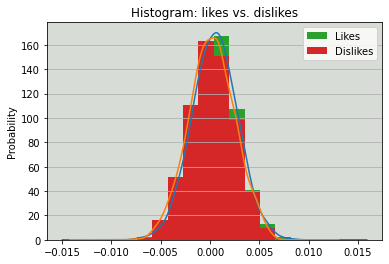

In [7]:
# draw the graph from the distribution between 'likes' and 'dislikes'
means = final_df['likes'].mean(), final_df['dislikes'].mean()
stdevs = final_df['likes'].std(axis = 0, skipna = True), final_df['dislikes'].std(axis = 0, skipna = True)
dist = pd.DataFrame(
np.random.normal(loc=means, scale=stdevs, size=(1000, 2)),
columns=['Likes', 'Dislikes'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

fig, ax = plt.pyplot.subplots()
dist.plot.kde(ax=ax, legend=False, title='Histogram: likes vs. dislikes')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

Different videos have different tags and we can see that they all are combined into one list in the column called "Tags". We will separate this list and calculate the total tags associated with each video. Additionally, we clean the tag names by stripping off non-required characters like "".

In [8]:
final_df['Tags'] = final_df['tags'].map(lambda tags:tags.split('|'))
for i in range(len(final_df['Tags'])):
    #k = final_df['Tags'][i]
    for k in range(len(final_df['Tags'][i])):
        final_df['Tags'][i][k] = final_df['Tags'][i][k].replace('\"','').rstrip().lstrip()          
final_df['TagCount'] = final_df['Tags'].map(lambda x:len(x))

#### 3.2 Text Data Preprocessing

In the following lines of code, we have performed cleaning on the textual data. We have first subsetted the original dataset based on those dataframes that have textual data in "English"

In [9]:
#Selecting the countries which have textual information in english
names_of_countries = ['CA','DE','FR','GB','IN','JP','KR','MX','RU','US']
qualified_countries = ['CA','IN','US','GB']
textdf = final_df[final_df['Country'].isin(['CA', 'IN','GB','US'])]

textdf['description_url']=textdf["description"].str.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

#We fill the missing values in the description url column 
textdf['description_url']=textdf['description_url'].fillna(0)

# Calculate the length of each observation of description_url column
textdf['len']=textdf['description_url'].apply(lambda x: len(x) if x!=0 else 0)

#Reset the index
textdf.reset_index(inplace = True)

# Remove "\\n" in description_url column
urls=[]
for i in range(len(textdf)):
    if textdf['len'][i]!=0:
        url=[]
        for j in textdf['description_url'][i]:
            suburl=0
            suburl=j.split('\\n')
            for item in range(len(suburl)):
                if suburl[item].find('http')!=-1:
                    url.append(suburl[item])
        urls.append(url)
    else:
        urls.append(0)
        
# Create a column to save the pure urls
textdf['pure_description_url']=urls

# Clean description column
textdf['description_text']=textdf['description']

for i in range(len(textdf)):
    if textdf['len'][i]!=0:
        for j in range(textdf['len'][i]):
            textdf['description_text'][i]=textdf['description_text'][i].replace(textdf['description_url'][i][j],'')

            
# Once done, we verify if the description text is truly free of its urls
textdf['description_text'][1]

'3 Days left to cop NELK merch:  us on Instagram!\\n@nelkboys\\n\\nNELK\\nTwitter:   nelkfilmz\\n\\nALL THE FIRE MUSIC BY:\\nInstagram - @StanBeats\\nStolen Identity - KILLY\\n\\nIntro and Outro Shot by: @leecreated\\n\\nFILMER:\\nInstagram - @905shooter'

#### 3.3 Deal with category_id

In [10]:
#Importing the required json file
CA_category = path+"CA_category_id.json"
DE_category = path+"DE_category_id.json"
FR_category = path+"FR_category_id.json"
GB_category = path+"GB_category_id.json"
IN_category = path+"IN_category_id.json"
JP_category = path+"JP_category_id.json"
KR_category = path+"KR_category_id.json"
MX_category = path+"MX_category_id.json"
RU_category = path+"RU_category_id.json"
US_category = path+"US_category_id.json"

In [12]:
## To CA
with open(CA_category,'r') as f:
    CA_dict = json.load(f)
## To DE
with open(DE_category,'r') as f:
    DE_dict = json.load(f)
## To FR
with open(FR_category,'r') as f:
    FR_dict = json.load(f)    
## To GB
with open(GB_category,'r') as f:
    GB_dict = json.load(f)
## To IN
with open(IN_category,'r') as f:
    IN_dict = json.load(f)    
## To JP
with open(JP_category,'r') as f:
    JP_dict = json.load(f)
## To KR
with open(KR_category,'r') as f:
    KR_dict = json.load(f)
## To MX
with open(MX_category,'r') as f:
    MX_dict = json.load(f)
## To RU
with open(RU_category,'r') as f:
    RU_dict = json.load(f)    
## To US
with open(US_category,'r') as f:
    US_dict = json.load(f)

    
final_df["category_id"]=final_df["category_id"].astype("str")

#CA
CA_list = CA_dict["items"]
CA_dict1 = {}
for i in range(len(CA_list)):
    CA_dict1[CA_list[i]["id"]] = CA_list[i]["snippet"]["title"]
final_df.loc[final_df['Country']=='CA','category_id']=final_df.loc[final_df['Country']=='CA','category_id'].replace(CA_dict1)

#DE
DE_list=DE_dict["items"]
DE_dict1={}
for i in range(len(DE_list)):
    DE_dict1[DE_list[i]["id"]]=DE_list[i]["snippet"]["title"]
final_df.loc[final_df['Country']=='DE','category_id']=final_df.loc[final_df['Country']=='DE','category_id'].replace(DE_dict1)

# RF
FR_list=FR_dict["items"]
FR_dict1={}
for i in range(len(FR_list)):
    FR_dict1[DE_list[i]["id"]]=FR_list[i]["snippet"]["title"]
final_df.loc[final_df['Country']=='FR','category_id']=final_df.loc[final_df['Country']=='FR','category_id'].replace(FR_dict1)

# GB
GB_list=GB_dict["items"]
GB_dict1={}
for i in range(len(GB_list)):
    GB_dict1[GB_list[i]["id"]]=GB_list[i]["snippet"]["title"]
final_df.loc[final_df['Country']=='GB','category_id']=final_df.loc[final_df['Country']=='GB','category_id'].replace(GB_dict1)

#IN
IN_list=IN_dict["items"]
IN_dict1={}
for i in range(len(IN_list)):
    IN_dict1[DE_list[i]["id"]]=IN_list[i]["snippet"]["title"]
final_df.loc[final_df['Country']=='IN','category_id']=final_df.loc[final_df['Country']=='IN','category_id'].replace(IN_dict1)

# JP
JP_list = JP_dict["items"]
JP_dict1 = {}
for i in range(len(JP_list)):
    JP_dict1[JP_list[i]["id"]] = JP_list[i]["snippet"]["title"]
final_df.loc[final_df['Country']=='JP','category_id']=final_df.loc[final_df['Country']=='JP','category_id'].replace(JP_dict1)

# KR
KR_list = KR_dict["items"]
KR_dict1 = {}
for i in range(len(KR_list)):
    KR_dict1[KR_list[i]["id"]] = KR_list[i]["snippet"]["title"]
final_df.loc[final_df['Country']=='KR','category_id']=final_df.loc[final_df['Country']=='KR','category_id'].replace(KR_dict1)

# MX
MX_list = MX_dict["items"]
MX_dict1 = {}
for i in range(len(MX_list)):
    MX_dict1[MX_list[i]["id"]] = MX_list[i]["snippet"]["title"]
final_df.loc[final_df['Country']=='MX','category_id']=final_df.loc[final_df['Country']=='MX','category_id'].replace(MX_dict1)

# RU
RU_list = RU_dict["items"]
RU_dict1 = {}
for i in range(len(RU_list)):
    RU_dict1[RU_list[i]["id"]] = RU_list[i]["snippet"]["title"]
final_df.loc[final_df['Country']=='RU','category_id']=final_df.loc[final_df['Country']=='RU','category_id'].replace(RU_dict1)

# US
US_list = US_dict["items"]
US_dict1 = {}
for i in range(len(US_list)):
    US_dict1[US_list[i]["id"]] = US_list[i]["snippet"]["title"]
final_df.loc[final_df['Country']=='US','category_id']=final_df.loc[final_df['Country']=='US','category_id'].replace(US_dict1)

final_df['category_id'] = final_df['category_id'].replace('29','Other')


final_df.rename(columns={'category_id':'category'},inplace = True)

In [13]:

textdf["category_id"]=textdf["category_id"].astype("str")


#CA
CA_list = CA_dict["items"]
CA_dict1 = {}
for i in range(len(CA_list)):
    CA_dict1[CA_list[i]["id"]] = CA_list[i]["snippet"]["title"]
textdf.loc[textdf['Country']=='CA','category_id']=textdf.loc[textdf['Country']=='CA','category_id'].replace(CA_dict1)

#DE
DE_list=DE_dict["items"]
DE_dict1={}
for i in range(len(DE_list)):
    DE_dict1[DE_list[i]["id"]]=DE_list[i]["snippet"]["title"]
textdf.loc[textdf['Country']=='DE','category_id']=textdf.loc[textdf['Country']=='DE','category_id'].replace(DE_dict1)

# RF
FR_list=FR_dict["items"]
FR_dict1={}
for i in range(len(FR_list)):
    FR_dict1[DE_list[i]["id"]]=FR_list[i]["snippet"]["title"]
textdf.loc[textdf['Country']=='FR','category_id']=textdf.loc[textdf['Country']=='FR','category_id'].replace(FR_dict1)

# GB
GB_list=GB_dict["items"]
GB_dict1={}
for i in range(len(GB_list)):
    GB_dict1[GB_list[i]["id"]]=GB_list[i]["snippet"]["title"]
textdf.loc[textdf['Country']=='GB','category_id']=textdf.loc[textdf['Country']=='GB','category_id'].replace(GB_dict1)

#IN
IN_list=IN_dict["items"]
IN_dict1={}
for i in range(len(IN_list)):
    IN_dict1[DE_list[i]["id"]]=IN_list[i]["snippet"]["title"]
textdf.loc[textdf['Country']=='IN','category_id']=textdf.loc[textdf['Country']=='IN','category_id'].replace(IN_dict1)

# JP
JP_list = JP_dict["items"]
JP_dict1 = {}
for i in range(len(JP_list)):
    JP_dict1[JP_list[i]["id"]] = JP_list[i]["snippet"]["title"]
textdf.loc[textdf['Country']=='JP','category_id']=textdf.loc[textdf['Country']=='JP','category_id'].replace(JP_dict1)

# KR
KR_list = KR_dict["items"]
KR_dict1 = {}
for i in range(len(KR_list)):
    KR_dict1[KR_list[i]["id"]] = KR_list[i]["snippet"]["title"]
textdf.loc[textdf['Country']=='KR','category_id']=textdf.loc[textdf['Country']=='KR','category_id'].replace(KR_dict1)

# MX
MX_list = MX_dict["items"]
MX_dict1 = {}
for i in range(len(MX_list)):
    MX_dict1[MX_list[i]["id"]] = MX_list[i]["snippet"]["title"]
textdf.loc[textdf['Country']=='MX','category_id']=textdf.loc[textdf['Country']=='MX','category_id'].replace(MX_dict1)

# RU
RU_list = RU_dict["items"]
RU_dict1 = {}
for i in range(len(RU_list)):
    RU_dict1[RU_list[i]["id"]] = RU_list[i]["snippet"]["title"]
textdf.loc[textdf['Country']=='RU','category_id']=textdf.loc[textdf['Country']=='RU','category_id'].replace(RU_dict1)

# US
US_list = US_dict["items"]
US_dict1 = {}
for i in range(len(US_list)):
    US_dict1[US_list[i]["id"]] = US_list[i]["snippet"]["title"]
textdf.loc[textdf['Country']=='US','category_id']=textdf.loc[textdf['Country']=='US','category_id'].replace(US_dict1)

textdf['category_id'] = textdf['category_id'].replace('29','Other')


textdf.rename(columns={'category_id':'category'},inplace = True)

In [14]:
final = final_df
text = textdf

### 4 Data Analysis

#### 4.1 What are the common trends on YouTube in general?
•	What are the popular categories in a particular month?  
•	Is there any discrepancy between different country?

In [15]:
trending_time = final['trending_date'].str.split('-')
final['trending_year'] = trending_time.str[2]
final['trending_month'] = trending_time.str[1]
final['trending_month_year'] = final['trending_date'].str[3:]
df = final.loc[:,['category_id','trending_month_year']]
my = np.unique(df['trending_month_year'])
df1 = df.groupby(['trending_month_year','category_id'])['category_id'].agg('count')
g_f = df1.groupby(level=0, group_keys=False)
fre_f=g_f.nlargest(1)
total_f = []
for i in my:
    total_f.append(len(df[df['trending_month_year']==i]))
pct_f = fre_f/total_f
pro_f = []
for i in range(len(pct_f)):
    pro_f.append(pct_f[i])
f_index = pct_f.index.get_level_values(1)
df_CA = final[final['Country']=='CA'].loc[:,['category_id','trending_month_year']]
df1_CA = df_CA.groupby(['trending_month_year','category_id'])['category_id'].agg('count')
g_CA = df1_CA.groupby(level=0, group_keys=False)
fre_CA=g_CA.nlargest(1)
total_CA = []
for i in my:
    total_CA.append(len(df_CA[df_CA['trending_month_year']==i]))
pct_CA = fre_CA/total_CA
pro_CA = []
for i in range(len(pct_CA)):
    pro_CA.append(pct_CA[i])
CA_index = pct_CA.index.get_level_values(1)

df_KR = final[final['Country']=='KR'].loc[:,['category_id','trending_month_year']]
df1_KR = df_KR.groupby(['trending_month_year','category_id'])['category_id'].agg('count')
g_KR = df1_KR.groupby(level=0, group_keys=False)
fre_KR=g_KR.nlargest(1)
total_KR = []
for i in my:
    total_KR.append(len(df_KR[df_KR['trending_month_year']==i]))
pct_KR = fre_KR/total_KR
pro_KR = []
for i in range(len(pct_KR)):
    pro_KR.append(pct_KR[i])
KR_index = pct_KR.index.get_level_values(1)

df_RU = final[final['Country']=='RU'].loc[:,['category_id','trending_month_year']]
df1_RU = df_RU.groupby(['trending_month_year','category_id'])['category_id'].agg('count')
g_RU = df1_RU.groupby(level=0, group_keys=False)
fre_RU=g_RU.nlargest(1)
total_RU = []
for i in my:
    total_RU.append(len(df_RU[df_RU['trending_month_year']==i]))
pct_RU = fre_RU/total_RU
pro_RU = []
for i in range(len(pct_RU)):
    pro_RU.append(pct_RU[i])
RU_index = pct_RU.index.get_level_values(1)

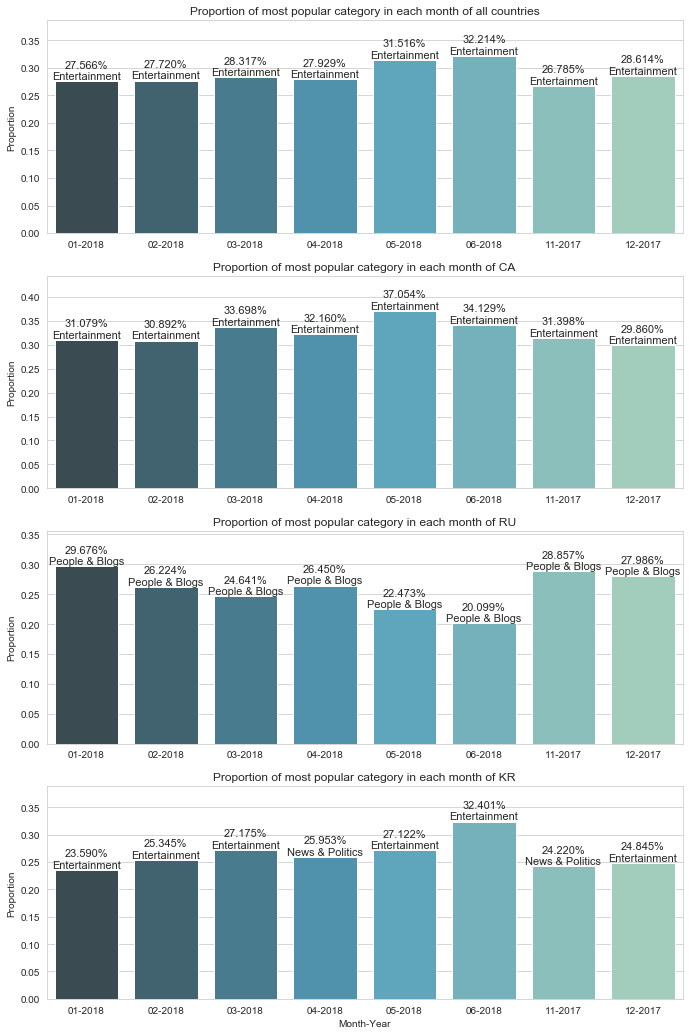

In [16]:
fig, (ax4,ax1, ax2, ax3) = plt.pyplot.subplots(4,1,figsize=(11.4,18))
sns.set_style('whitegrid')

title_f = f'Proportion of most popular category in each month of all countries'
sns.set_style('whitegrid')
ax4 = sns.barplot(x=my, y=pro_f, palette='GnBu_d', ax=ax4)
ax4.set_title(title_f)
ax4.set(ylabel='Proportion')  
ax4.set_ylim(top=max(pro_f)*1.2)

for bar, proportion,index in zip(ax4.patches, pro_f, f_index):
    text_x = bar.get_x() + bar.get_width() / 2.0  
    text_y = bar.get_height() 
    text = f'{proportion:.3%}\n{index}'
    ax4.text(text_x, text_y, text, 
              fontsize=11, ha='center', va='bottom')

title_CA = f'Proportion of most popular category in each month of CA'
sns.barplot(x=my, y=pro_CA, palette='GnBu_d',ax=ax1)
ax1.set_title(title_CA)
ax1.set(ylabel='Proportion')  
ax1.set_ylim(top=max(pro_CA)*1.2)

for bar, proportion,index in zip(ax1.patches, pro_CA, CA_index):
    text_x = bar.get_x() + bar.get_width() / 2.0  
    text_y = bar.get_height() 
    text = f'{proportion:.3%}\n{index}'
    ax1.text(text_x, text_y, text, 
              fontsize=11, ha='center', va='bottom')

title_RU = f'Proportion of most popular category in each month of RU'
sns.barplot(x=my, y=pro_RU, palette='GnBu_d',ax = ax2)
ax2.set_title(title_RU)
ax2.set(ylabel='Proportion')  
ax2.set_ylim(top=max(pro_RU)*1.2)

for bar, proportion,index in zip(ax2.patches, pro_RU, RU_index):
    text_x = bar.get_x() + bar.get_width() / 2.0  
    text_y = bar.get_height() 
    text = f'{proportion:.3%}\n{index}'
    ax2.text(text_x, text_y, text, 
              fontsize=11, ha='center', va='bottom')
    
title_KR = f'Proportion of most popular category in each month of KR'
sns.barplot(x=my, y=pro_KR, palette='GnBu_d',ax=ax3)
ax3.set_title(title_KR)
ax3.set(xlabel='Month-Year', ylabel='Proportion')  
ax3.set_ylim(top=max(pro_KR)*1.2)

for bar, proportion,index in zip(ax3.patches, pro_KR, KR_index):
    text_x = bar.get_x() + bar.get_width() / 2.0  
    text_y = bar.get_height() 
    text = f'{proportion:.3%}\n{index}'
    ax3.text(text_x, text_y, text, 
              fontsize=11, ha='center', va='bottom')

Conclusion:  
The most popular category in each month may vary along with the different countries as well as different months.  
For example, in Russia, the most popular category each month is People&Blogs instead of Entertainment; while in Korean, the most popular category in most months are Entertainment but there are also months when News&Politics attracted more viewers.  
This discrepancy indicating that different culture in different countries and special time period can affect the popularity of certain categories.

#### 4.2 What factors affect the popularity of a YouTube video?
•	Which categories of YouTube videos are the most popular?  
•	Which video category (e.g. entertainment, gaming, comedy, etc.) has the largest number of trending videos? 

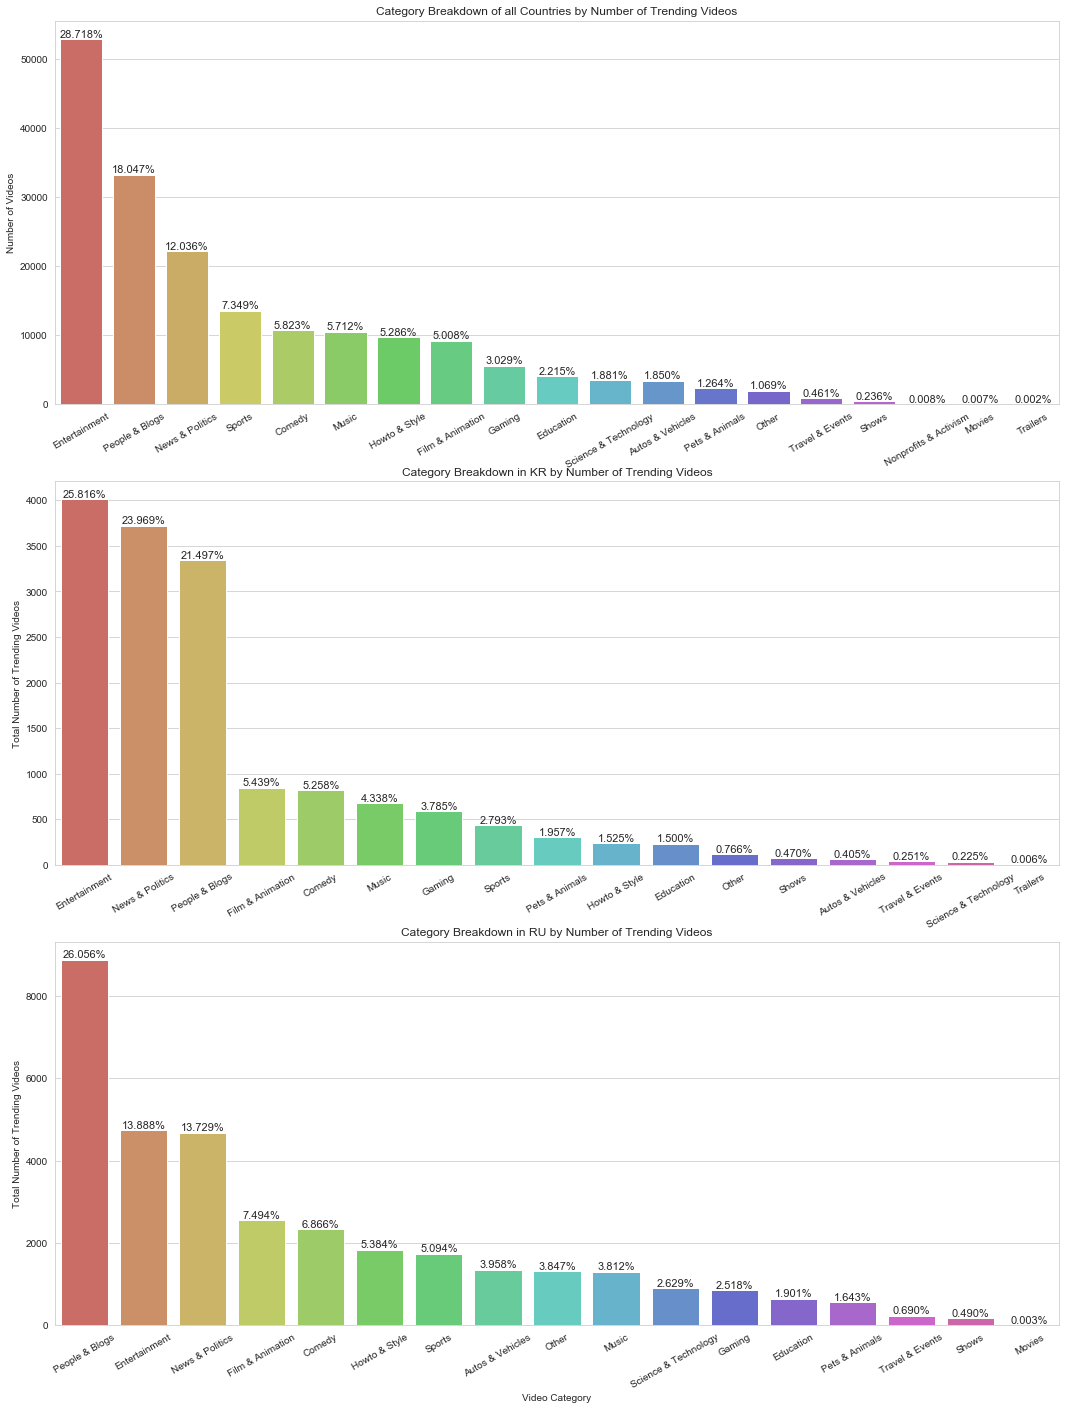

In [17]:
#group the video_id by category and then calculate the count()
a = final.loc[final['category_id'] != "29"]['video_id'].groupby(by=final['category_id']).count().sort_values(ascending=False)

# create plots
fig1, (ax11,ax21,ax31) = plt.pyplot.subplots(3,1,figsize=(18,24))
sns.barplot(x = a.index, y = a.values,  data = final,
            palette = 'hls',label = 'Count of Videos Per Video Category of all Countries',ax=ax11)
ax11.set_title("Category Breakdown of all Countries by Number of Trending Videos")            
ax11.set_xticklabels(a.index,rotation=30)
frequencies = list(a.values)

ax11.set(xlabel = '',ylabel = "Number of Videos")

for bar,frequency in zip(ax11.patches, frequencies):
    text_x = bar.get_x() + bar.get_width() / 2.0  
    text_y = bar.get_height() 
    #text = f'{frequency:,}\n{frequency / (sum(frequencies)):.3%}'
    text = f'{frequency / (sum(frequencies)):.3%}'
    ax11.text(text_x, text_y, text, 
              fontsize=11, ha='center', va='bottom')    

df_subset = final.loc[final['Country'] == 'KR'].loc[(final['category_id'] != "29")]
p = df_subset['category_id'].value_counts()
sns.barplot(x = p.index, y = p.values,  data = final,
            palette = 'hls',label = 'Count of Likes Per Video Category',ax=ax21)
ax21.set_xticklabels(p.index,rotation=30)
frequencies = list(p.values)
ax21.set_title("Category Breakdown in KR by Number of Trending Videos")
ax21.set(ylabel = "Total Number of Trending Videos")

for bar,frequency in zip(ax21.patches, frequencies):
    text_x = bar.get_x() + bar.get_width() / 2.0  
    text_y = bar.get_height() 
    #text = f'{frequency:,}\n{frequency / (sum(frequencies)):.3%}'
    text = f'{frequency / (sum(frequencies)):.3%}'
    ax21.text(text_x, text_y, text, 
              fontsize=11, ha='center', va='bottom')

df_subset = final.loc[final['Country'] == 'RU'].loc[(final['category_id'] != "29")]
p1 = df_subset['category_id'].value_counts()
sns.barplot(x = p1.index, y = p1.values,  data = final,
            palette = 'hls',label = 'Count of Likes Per Video Category',ax=ax31)
ax31.set_xticklabels(p1.index,rotation=30)
frequencies = list(p1.values)
ax31.set_title("Category Breakdown in RU by Number of Trending Videos")
ax31.set(xlabel = "Video Category",ylabel = "Total Number of Trending Videos")

for bar,frequency in zip(ax31.patches, frequencies):
    text_x = bar.get_x() + bar.get_width() / 2.0  
    text_y = bar.get_height() 
    #text = f'{frequency:,}\n{frequency / (sum(frequencies)):.3%}'
    text = f'{frequency / (sum(frequencies)):.3%}'
    ax31.text(text_x, text_y, text, 
              fontsize=11, ha='center', va='bottom')  

Conclusion:  
We can see, that overall, "Entertainment" category has the greatest number of trending videos. Thus, we can conclude, that Youtube as a platform has higher number of trending videos for "Entertainment".  
Surprisingly, in KR, News and Politics are viewed almost as much as "Entertainment". This means that Youtube considered a good platform for viewing "News" in KR.  
In the country RU, the category with highest number of trending videos is "People & Blogs".This suggests that the people of RU love to watch videos about Blogging,Travel, etc.

In [18]:
df_subset1 = final.loc[final['category_id'] == "Entertainment"][['title','trending_date_count']]
df_subset1.sort_values('trending_date_count',ascending = False,inplace = True)
df_subset1.head()

,title,trending_date_count
183803,Marvel Studios' Ant-Man and The Wasp - Officia...,86
181703,Jurassic World: Fallen Kingdom - Official Trai...,75
182787,Marvel Studios' Avengers: Infinity War - Offic...,71
181491,Marvel Studios’ Avengers: Infinity War - Big G...,68
181822,VENOM - Official Teaser Trailer (HD),68


From the above table, we can clearly see that the most trending videos in the "Entertainment" category belong to the videos made by "Marvel Studious" which are associated with various heroes portrayed in their movies.

•	What are the top 10 most popular tags?  
•	What types of tags frequently appear in the most top-trending videos?  

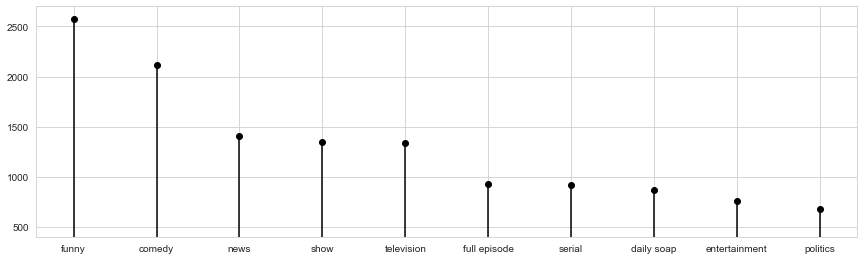

In [20]:
df_tag=text['tags'].apply(lambda x:x.replace('"','')).str.split('|')
df_tag.head()
word=[]
for i in df_tag:
    word+=i
word
from collections import Counter
result = Counter(word)
df_tagnew=pd.DataFrame.from_dict(result,orient='index',columns=['occurancy'])
df_tagnew.sort_values(by=['occurancy'], ascending=False,inplace=True)
#df_tagnew.drop([1])
df_tagnew.drop(['[none]','2018','watch online','News','video'],inplace=True)
df_tagnew.head(10)
df_tagtop10=df_tagnew.head(10)
df_tagtop10.reset_index()
fig, ax = plt.pyplot.subplots()
plt.pyplot.subplots_adjust(left=0.3, bottom=0.5, right=2.2, top=1.3, wspace=100, hspace=None)

ax.vlines(df_tagtop10.index, ymin=0, ymax=df_tagtop10.occurancy)
ax.plot(df_tagtop10.index, df_tagtop10.occurancy, "o", color='black')
ax.set_ylim(400, 2700);

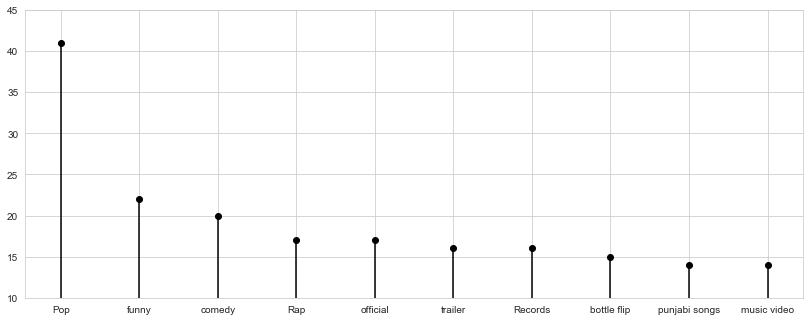

In [21]:
text["tags"]=text["tags"].astype(str)
df_tags = text[text['tags'].notnull()]
frenquency_trending1=df_tags.sort_values('views').drop_duplicates('video_id', keep='last').reset_index()
frenquency_trending1 =frenquency_trending1.drop("index", axis=1)
frenquency_trending1=frenquency_trending1.sort_values('views',ascending=False).head(500)
frenquency_trending=frenquency_trending1['tags'].apply(lambda x:x.replace('"','')).str.split('|')
frenquency_trending.head()
word=[]
for i in frenquency_trending:
    word+=i
word
from collections import Counter
result = Counter(word)
frenquency_trending=pd.DataFrame.from_dict(result,orient='index',columns=['occurancy'])
frenquency_trending.sort_values(by=['occurancy'], ascending=False,inplace=True)
#df_tagnew.drop([1])
frenquency_trending.drop(['[none]'],inplace=True)
frenquency_trending.head(10)
frenquency_trending10=frenquency_trending.head(10)
frenquency_trending10.reset_index()
fig, ax = plt.pyplot.subplots()
plt.pyplot.subplots_adjust(hspace=100)
plt.pyplot.subplots_adjust(wspace=100)

plt.pyplot.subplots_adjust(left=0.2, bottom=0.5, right=2, top=1.5, wspace=100, hspace=None)


ax.vlines(frenquency_trending10.index, ymin=0, ymax=frenquency_trending10.occurancy)
ax.plot(frenquency_trending10.index, frenquency_trending10.occurancy, "o", color='black')
ax.set_ylim(10, 45);

Conclusion:  
From the first graph above, we can see that 'funny'and 'comedy' tags appear most. Most people like 'funny' stuff for relaxing. 'News' and 'politics' still appear in the top 10 useful tags too. Except for the relaxing period, people care a lot about formal politics.  
In the second graph, we try to find out the top words appeared in the most 500 trending vidoes, 'pop' and 'Rap' appears at this time. Maybe the reason is that videos relating to 'music' appears most in the most 500 trending videos.

•	Which YouTube channels have the largest number of trending videos?

In [22]:
# Set the "video_id" column as the index
df2 = final.set_index('video_id', drop = True)
# Pick top 10 YouTube channels with the largest number of views
channel_category = df2.groupby(by = ['channel_title'])['views'].agg(['sum','mean','count'])
channel_analysis = pd.DataFrame(channel_category)
channel_analysis.sort_values(by='sum', ascending=False).head(20)

,sum,mean,count
channel_title,,,
T-Series,0.688128,0.009557,72
WWE,0.422703,0.002082,203
5-Minute Crafts,0.419384,0.003177,132
ibighit,0.401565,0.040156,10
ChildishGambinoVEVO,0.332905,0.166452,2
Dude Perfect,0.330297,0.020644,16
Marvel Entertainment,0.328157,0.012621,26
The Late Show with Stephen Colbert,0.321334,0.001397,230
MLG Highlights,0.312646,0.002202,142


In [23]:
x = channel_category.sort_values(by='sum', ascending=False).head(20)
display(x[x['count']<=x['count'].mean()])
display(x[x['count']>72.95])

,sum,mean,count
channel_title,,,
T-Series,0.688128,0.009557,72
ibighit,0.401565,0.040156,10
ChildishGambinoVEVO,0.332905,0.166452,2
Dude Perfect,0.330297,0.020644,16
Marvel Entertainment,0.328157,0.012621,26
jypentertainment,0.288162,0.014408,20
PewDiePie,0.283444,0.005062,56
Speed Records,0.281796,0.004697,60
Ed Sheeran,0.248400,0.041400,6


,sum,mean,count
channel_title,,,
WWE,0.422703,0.002082,203
5-Minute Crafts,0.419384,0.003177,132
The Late Show with Stephen Colbert,0.321334,0.001397,230
MLG Highlights,0.312646,0.002202,142
TheEllenShow,0.262624,0.001787,147
Jimmy Kimmel Live,0.251008,0.001685,149


Observations:
By the mean frequency, which is 72.95, of top 20 channels with most views of trending videos, 14 channels, 70% of top 20 channels, are labeled as striking trending channels which are able to catch a large amount of viewers once a video is published, even though they might seldom do so, while the remaing 6 channels, accounting for 30% in the top 20, are labeled as regular trending channels whose videos are frequently posted and ranked to be trending.

Two classes:
1. A regular trending channel includs WWE, 5-Minute Crafts, The Late Show with Stephen Colbert, MLB Highlights, TheEllenShow and Jimmy Kimmel Live.
2. A striking trending channel entails T-Series, ibighit, ChildishGambinoVEVO, Dude Perfect, Marvel Entertainment and jypentertainment, PewDiePie, Speed Records, Ed Sheeran, Zee Music Company, YRF, Goldmines Telefilms, Amit Bhadana, Amit Bhadana and SMTOWN.

•	Why do top 10 channels get more views in Youtube? Do they have some similar characteristics??

In [24]:
channel_category1 = df2.groupby(by = ['channel_title','category_id'])['views'].agg(['sum','mean','count'])
display(x[x['count']<=72.95])
display(x[x['count']>72.95])

,sum,mean,count
channel_title,,,
T-Series,0.688128,0.009557,72
ibighit,0.401565,0.040156,10
ChildishGambinoVEVO,0.332905,0.166452,2
Dude Perfect,0.330297,0.020644,16
Marvel Entertainment,0.328157,0.012621,26
jypentertainment,0.288162,0.014408,20
PewDiePie,0.283444,0.005062,56
Speed Records,0.281796,0.004697,60
Ed Sheeran,0.248400,0.041400,6


,sum,mean,count
channel_title,,,
WWE,0.422703,0.002082,203
5-Minute Crafts,0.419384,0.003177,132
The Late Show with Stephen Colbert,0.321334,0.001397,230
MLG Highlights,0.312646,0.002202,142
TheEllenShow,0.262624,0.001787,147
Jimmy Kimmel Live,0.251008,0.001685,149


Observations:
1. Even though a channel may post different types of videos, the major type for each top 20 channels remains almost constant, so a small variation of top 20 trending channels ranking is available and will be ignored.
2. For a striking trending channel, 9 channels fall into the music and 5 channels into other categories. Thus, 45% of top 20 trending channels is the music channel.
3. For a regular trending channel, its category is more diverse and there is no preference on categories.

•	Does the large proportion of the music channel in total blame for this video preference?

In [25]:
pd.DataFrame(channel_category1.count(level=1)['count']).apply(lambda x: x/sum(x)).sort_values(by='count',ascending=False).rename(columns={'count':'percentage'})

,percentage
category_id,
People & Blogs,0.245697
Entertainment,0.211147
Music,0.104587
News & Politics,0.082491
Sports,0.072725
Film & Animation,0.057189
Gaming,0.049470
Comedy,0.046042
Howto & Style,0.039926


Conclusion:
1. Youtube views prefer the music channel than other channels due to 45% music channels in the top 20 trending channels and only 10% music channels of all channels.
2. Music channel features low-frequency release and power viewer attraction and those characteristics are not observed in other types of channels.

#### 4.3 What is the best posting time on Youtube to be on the top trending?

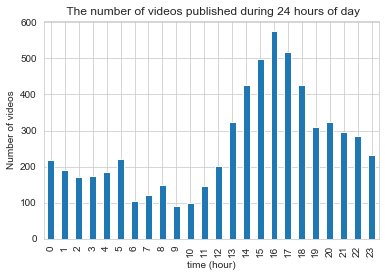

In [26]:
df = final[final['Country']=='US']
df.publish_time = df.publish_time.astype("datetime64")
plt.pyplot.xlabel('time (hour)')
plt.pyplot.ylabel('Number of videos')
plt.pyplot.title(' The number of videos published during 24 hours of day')
df["publish_time"].dt.hour.value_counts().sort_index().plot(kind='bar');

The graph above shows that the best time to upload a trending video on Youtube is late afternoon (since our dataset is about top trending videos), and the most popular time to upload a trending videos is from 15:00 to 18:00. Some explanations for this trend might be:
- From 6 to 11:am is the working hour in the morning, so people do not spend time watching Youtube. Therefore, it's not a good idea to publish videos during this time.
- From late afternoon until midnight, these hours are most users online time. 
- The default timezone of uploading videos on Youtube is Pacific Standard Time (PST), which is the earliest timezone in the US. The other zones in the US - the Central and Eastern Time zones, which also have the most internet users and the biggest market share (https://royal.pingdom.com/internet-users-time-zone-2/), are one to two hours later. It means that the most popular time to upload a trending videos is from 17:00 to 20:00. This really makes sense, since this time is usually the rest time of people, so uploading new videos during this time could optimize user views and interaction.  


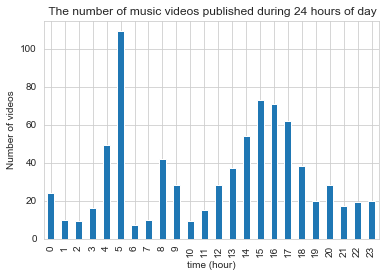

In [27]:
plt.pyplot.xlabel('time (hour)')
plt.pyplot.ylabel('Number of videos')
plt.pyplot.title(' The number of music videos published during 24 hours of day')
df[df["category_id"] == 'Music']['publish_time'].dt.hour.value_counts().sort_index().plot(kind='bar');

This result is surprising! Beside having the same pattern of frequent publish time from late afternoon to night as the overall chart, the highest number of Youtube video uploaded is at...5am! Moreover, the number of video uploaded drops significantly at 6:am (and this is also the time with lowest number of videos being uploaded). Let see what happens at 5:am morning:

In [28]:
df[df["publish_time"].dt.hour == 5][df['category_id'] == 'Music'].head(5)

,video_id,trending_date,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,...,ratings_disabled,video_error_or_removed,description,Country,trending_date_count,Tags,TagCount,trending_year,trending_month,trending_month_year
177974,pz95u3UVpaM,14-11-2017,Camila Cabello - Havana (Vertical Video) ft. Y...,CamilaCabelloVEVO,Music,10-11-2017,2020-04-29 05:01:00,"camila cabello|""camila""|""young thug""|""havana""|...",0.008032,0.014338,...,0,0,Havana – Spotify Vertical Video \nVideo Direct...,US,13,"['camila cabello', 'camila', 'young thug', 'ha...",31,2017,11,11-2017
178024,UFPSIa1cLRQ,14-11-2017,Phillip Phillips - Magnetic (Audio),PhilPhillipsVEVO,Music,09-11-2017,2020-04-29 05:00:01,"Phillip|""Phillips""|""Magnetic""|""Interscope""|""Pop""",0.000056,0.000110,...,0,0,"Pre-order Phillip Phillips’ “Collateral” now, ...",US,1,"['Phillip', 'Phillips', 'Magnetic', 'Interscop...",5,2017,11,11-2017
178048,viyRD5z6ilQ,15-11-2017,Luke Bryan - O Holy Night (Audio),LukeBryanVEVO,Music,10-11-2017,2020-04-29 05:00:01,"Luke|""Bryan""|""Holy""|""Night""|""Capitol""|""Records...",0.000216,0.000271,...,0,0,Music video by Luke Bryan performing O Holy Ni...,US,2,"['Luke', 'Bryan', 'Holy', 'Night', 'Capitol', ...",8,2017,11,11-2017
178052,xg9ebVTL9yE,15-11-2017,Empire Of The Sun - Way To Go,empireofthesunvevo,Music,10-11-2017,2020-04-29 05:00:06,"Empire|""Of""|""The""|""Sun""|""Way""|""To""|""Go""|""EMI""|...",0.000262,0.000454,...,0,0,Download or stream “Way to Go” by Empire of th...,US,13,"['Empire', 'Of', 'The', 'Sun', 'Way', 'To', 'G...",33,2017,11,11-2017
178053,fbHbTBP_u7U,15-11-2017,NF - Let You Down,NFVEVO,Music,09-11-2017,2020-04-29 05:00:05,"NF|""Let You Down""|""music video""|""official vide...",0.003205,0.004851,...,0,0,Official music video for “Let You Down” by NF ...,US,2,"['NF', 'Let You Down', 'music video', 'officia...",11,2017,11,11-2017


From the list above, we notice that most music videos uploaded during 5am to 6am are actually published at almost around 5:00:00! It means that most music channels (or artists) *intentionally* upload their videos at sharp 5:00 am. 

Why does this happen? We found that, according to insideradio, the best download time slot for podcast is at 1am and 5am, and the hour with the most downloads per average episode is 5am on Tuesday. The reason could be that many people download and listen to podcasts in the morning, before or on their way to work and school. Even though this observation is only for podcast, this could be part of the reason for what we observe in this data. If the music videos is uploaded at 5 am, with additional amount of time for the video to be indexed in Youtube, it would be ready to be noticed by large number of views at 6 am when people wake up, check their phone, see notifications on Youtube of their favorite artists, and listen to it on their way to work.   

reference: http://www.insideradio.com/podcastnewsdaily/for-podcast-publishing-timing-is-everything-so-are-days-of/article_cc850898-7269-11e9-b5ff-332d5280c567.html

Another aspect to consider is which dates in the week is the best date to publish a video? Let's have a look at the graph showing the number of videos published in 7 days of a week of all category type and of music type alone.

In [29]:
df["trending_date"]=df["trending_date"].astype("datetime64[ns]")
df["publish_date"]=df["publish_date"].astype("datetime64[ns]")
df["publish_weekday"]=df["publish_date"].dt.weekday+1
df["trending_weekday"]=df["trending_date"].dt.weekday+1

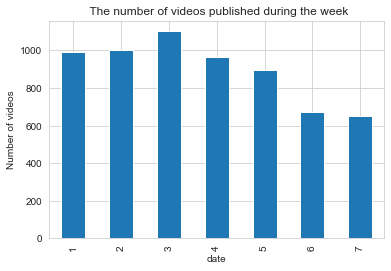

In [30]:
plt.pyplot.xlabel('date')
plt.pyplot.ylabel('Number of videos')
plt.pyplot.title(' The number of videos published during the week')
df["publish_weekday"].value_counts().sort_index().plot(kind='bar');

We can see that in general, most of top trending youtube videos are uploaded on weekdays rather than weekends. The reason could be because during business days, people do not have time to go outside and only have time for sort rests. Hence, they tend to watch youtube more often during weekdays. On weekend, people tend to spend time with family or go for a trip rather than watching videos at home.

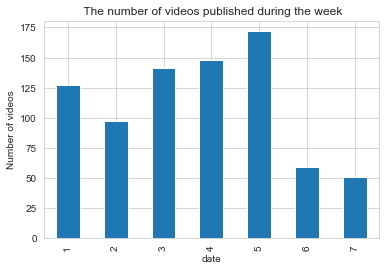

In [31]:
plt.pyplot.xlabel('date')
plt.pyplot.ylabel('Number of videos')
plt.pyplot.title(' The number of videos published during the week')
#df["publish_weekday"].value_counts().sort_index().plot(kind='bar')
df[df["category_id"] == 'Music']['publish_weekday'].value_counts().sort_index().plot(kind='bar');

 This pattern happen again in music videos: top trending youtube videos are more likely to uploaded on weekdays rather than weekends. 
 
 However, in this case, there is one interesting difference: the number of music videos uploaded on Friday is significantly higher than the rest of the days. The reason is that: because most of trending music videos on youtube, as we analyzed earlier, are much more likely to *intentionaly* upload for the sake of large user views and interaction. Friday is the time when most people finish their work in a week (but they also dont want to go outside as well), so people tend to spend more time on watching youtube videos than other days. 
 
 In conclusion, 5am on Friday could a very good time to upload youtube videos!!!

### 6 Conclusion

Following are the comparisons of our expected finding and results at the end of our analysis:  
1)	Expect: the most popular videos are music correlated, breaking news and comedy in different regions.   
Result: the most popular videos are entertainment, new & politics, people and blogs, which is not what we expect. However, music videos, even though is not the category with highest number of trending videos, it has the highest number of channels that have top trending videos.   
2)	Expect: The critical factors affecting popularity of a video might be: the number of likes, counts of comments, categories, tags, and Youtube channels.  
Result: We found that the number of likes, dislike, counts of comments are not critical factors affecting the popularity of a video. Instead, the relationship is reversed. Top trending videos tend to have (and is the reason of) more number of likes, dislikes, and comments. This is why we are more focus on the relationship between the number of videos and video categories, instead of the relationship between the number of videos and the number of likes, dislikes and comments.   
3)	Expect: Trending videos are usually posted during 7p.m.- 12p.m. on weekends.  
Result: we were surprised to find that trending videos are usually published at 5am for music category and on Friday, not weekends.